In [10]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1. PCA 개념 접근
#### 먼저 임의의 데이터셋을 생성한다 

In [11]:
random.seed(50120057)

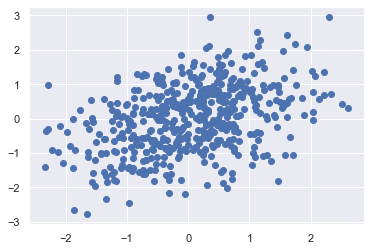

In [17]:
X= np.dot(np.random.rand(2,2),np.random.randn(2,500)).T
plt.scatter(X[:,0],X[:,1])

#### sklearn을 통해 PCA를 수행할 수 있는 library 가져오고 PCA 수행

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) ## 주성분 개수를 결정
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### 각각의 입력값을 통해 eigen_value와 분산 비율을 알 수 있음

In [34]:
print('eigen_values :',pca.explained_variance_)
print('explained_variance_ratio :',pca.explained_variance_ratio_)

eigen_values : [1.27974068 0.53414711]
explained_variance_ratio : [0.70552362 0.29447638]


- $\lambda_{1} = 1.2797$, $\lambda_{2} = 0.5341$
- 이를통해 우리는 분산비율을 계산할 수 있고 첫번째 주성분은 데이터 전체 분산의 70.5%를 설명할 수 있고 이후 두번째 주성분이 데이터 전체 분산의 29.5%를 설명할 수 있음을 확인한다.

In [33]:
print('eigen_vector : \n', pca.components_.T)

eigen_vector : 
 [[ 0.67433455 -0.73842597]
 [ 0.73842597  0.67433455]]


#### 기존 데이터에 PCA 벡터 추가하기

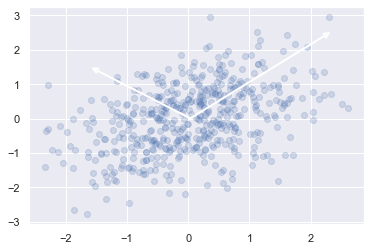

In [32]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

### 2.IRIS 데이터를 통한 PCA 
#### IRIS 데이터셋 불러오기

In [36]:
import pandas as pd

In [37]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# 데이터를 data_frame 형태로 저장
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [73]:
df.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
### target 변수와 feature의 분리
y = df.iloc[:,-1] 
x = df.iloc[:,0:4]

In [55]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

- PCA는 데이터에 대한 탐색적 과정이기 때문에 target변수와 feature를 분리시켜 feature에 대해서 살펴볼 것이다.
- 또한 PCA를 하기 이전에 데이터 스케일링을 진행하는 것이 좋다.
- 데이터간 스케일이 다르면, 주성분의 설명 가능한 분산의 양이 왜곡될 수 있고 이에 따라 PCA의 결과가 나빠질 수 있다.

In [56]:
from sklearn.preprocessing import StandardScaler
sc_x = pd.DataFrame(StandardScaler().fit_transform(x),columns = features)  

In [57]:
sc_x.head(5)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### PCA 수행

- 앞선 예시에서는 n_compoents 를 사전에 결정하였으나 이번에는 기존 데이터셋의 컬럼 개수만큼 입력해보고 Scree Plot을 이용해 결정해보고자 한다.

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) 
pca_fit = pca.fit(sc_x)

In [62]:
print("eigen_vector : \n :", pca.components_.T)
print('\n eigen_values :',pca.explained_variance_)
print('\n explained_variance_ratio :',pca.explained_variance_ratio_)

eigen_vector : 
 : [[ 0.52237162  0.37231836 -0.72101681 -0.26199559]
 [-0.26335492  0.92555649  0.24203288  0.12413481]
 [ 0.58125401  0.02109478  0.14089226  0.80115427]
 [ 0.56561105  0.06541577  0.6338014  -0.52354627]]

 eigen_values : [2.93035378 0.92740362 0.14834223 0.02074601]

 explained_variance_ratio : [0.72770452 0.23030523 0.03683832 0.00515193]


#### Scree Plot 그리기

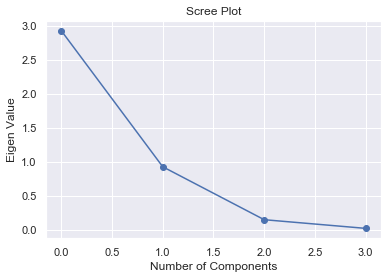

In [65]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigen Value')
plt.plot(pca.explained_variance_,'o-')

- Scree Plot을 통해 주성분 개수를 결정하는 과정에서는 기울기가 급격하게 완만하게 변화하는 곳에서 최적의 Principal Component 개수를 결정짓는다.
- 이 그림을 통해 유추해보면 Principal Component는 2개가 적당해 보인다.

#### 2개의 주성분으로 이루어진 데이터 프레임 구성

In [67]:
pca = PCA(n_components=2) 
pcc = pca.fit_transform(sc_x) ## pcc = principal component
p_df = pd.DataFrame(pcc, columns = ['PC1', 'PC2'])

In [92]:
finalDf = pd.concat([p_df, y], axis = 1)

In [93]:
finalDf.head(5)

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### 원본 데이터셋과의 비교

- 기존 iris 데이터는 다음과 같이 4개의 컬럼 중 2개를 선택하여 그릴 수 있었다.
- petal length와 petal width의 특징으로 데이터를 잘 분류할 수 있음을 확인 가능

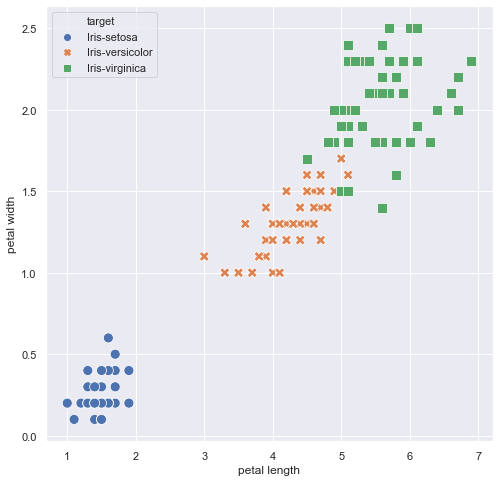

In [89]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x='petal length', 
                y='petal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=df)
plt.show()

#### 2개의 Principal Component를 이용, iris target 변수를 기존처럼 분별해낼 수 있음.

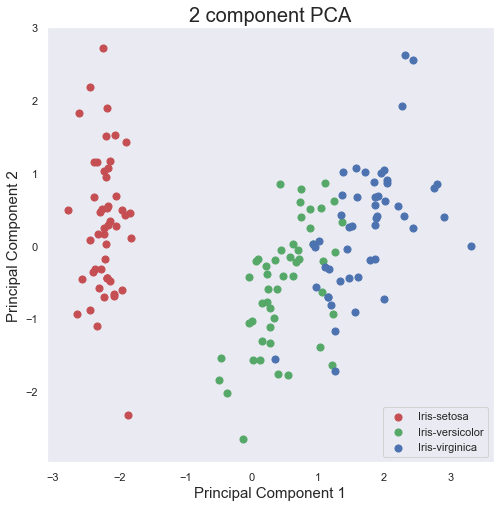

In [91]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()